## Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

## Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Data dictionary:

- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : LoanTap assigned loan grade
- sub_grade : LoanTap assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- open_acc : The number of open credit lines in the borrower's credit file.
- pub_rec : Number of derogatory public records
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc : The total number of credit lines currently in the borrower's credit file
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
- pub_rec_bankruptcies : Number of public record bankruptcies
- Address: Address of the individual

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv('LoanTap Data.csv')

In [3]:
#Checking the first 5 records
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
#Number of rows and columns
df.shape
#There are 27 columns, we need to determine which columns are not important.

(396030, 27)

In [5]:
#Checking for the different columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
#Checking for total number of unique values for each column and a few unique values for each column
for column in df.columns:
    print(column,'-',df[column].nunique(),'Number of unique values')
    print(column,'-',df[column].unique()[:5])
    print('--------------')
#Seems like there are few categorical and few continuous features

loan_amnt - 1397 Number of unique values
loan_amnt - [10000.  8000. 15600.  7200. 24375.]
--------------
term - 2 Number of unique values
term - [' 36 months' ' 60 months']
--------------
int_rate - 566 Number of unique values
int_rate - [11.44 11.99 10.49  6.49 17.27]
--------------
installment - 55706 Number of unique values
installment - [329.48 265.68 506.97 220.65 609.33]
--------------
grade - 7 Number of unique values
grade - ['B' 'A' 'C' 'E' 'D']
--------------
sub_grade - 35 Number of unique values
sub_grade - ['B4' 'B5' 'B3' 'A2' 'C5']
--------------
emp_title - 173105 Number of unique values
emp_title - ['Marketing' 'Credit analyst ' 'Statistician' 'Client Advocate'
 'Destiny Management Inc.']
--------------
emp_length - 11 Number of unique values
emp_length - ['10+ years' '4 years' '< 1 year' '6 years' '9 years']
--------------
home_ownership - 6 Number of unique values
home_ownership - ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
--------------
annual_inc - 27197 Number of uni

In [7]:
#Checking for duplicate rows
df[df.duplicated()]
#There are no duplicate rows

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
#Dividing the dataset into train and test sets.
df_train,df_test=train_test_split(df,test_size=0.2,random_state=2)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [10]:
#Checking the shape of train and test sets
print(df_train.shape)
print(df_test.shape)

(316824, 27)
(79206, 27)


### EDA, Univariate and Bivariate Analysis on Train_Data

In [11]:
#Checking for null values in X_train
display(df_train.isna().sum())
# emp_title,emp_length,mort_acc,pub_rec_bankruptcies,revol_util,title columns have null values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               18252
emp_length              14572
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1418
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                223
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                30091
pub_rec_bankruptcies      423
address                     0
dtype: int64

In [12]:
#Making 2 variables to split the features into categorical and continuous features
categorical_columns=[]
continuous_columns=[]

### 1) Loan_Status - Target Variable

In [13]:
variable='loan_status'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 2 unique values
# This is a categorical variable. Hence we have a classification problem in hand.

Number of Null Values - 0
Number of Unique Values - 2


Fully Paid     80.0
Charged Off    20.0
Name: loan_status, dtype: float64


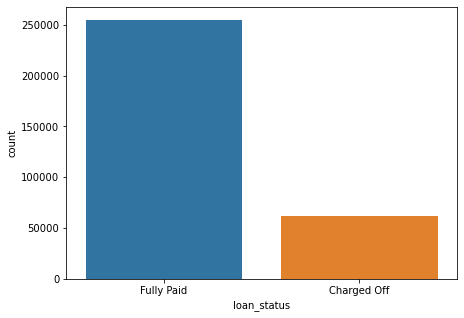

In [14]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))
#We have imbalanced target data. Need to adopt some technique to take care of imbalanced data.

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()

### 2) Loan_Amount

In [15]:
variable='loan_amnt'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 1387 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 1389


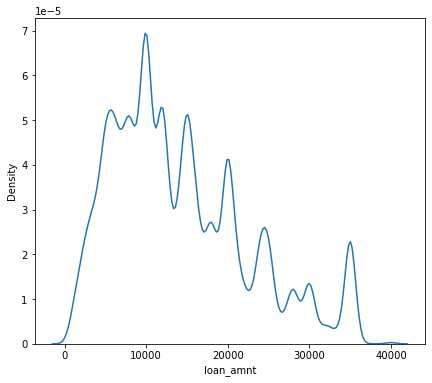

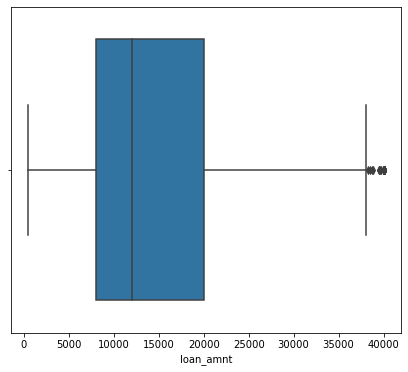

In [16]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

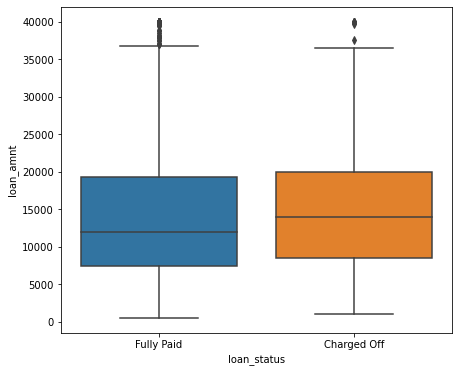

In [17]:
#Checking Loan_Status with Loan_Amount to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median loan_amount is higher for charged off loans in comparison to fully_paid loans.

In [18]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean loan_amount is higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    15128.570278
Fully Paid     13871.043024
Name: loan_amnt, dtype: float64

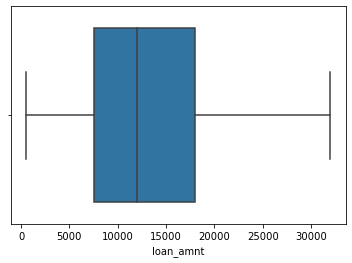

In [19]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

In [20]:
# Since mean and median loan_amount is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 3) Term

In [21]:
variable= 'term'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 2 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 2


 36 months    78.0
 60 months    22.0
Name: term, dtype: float64


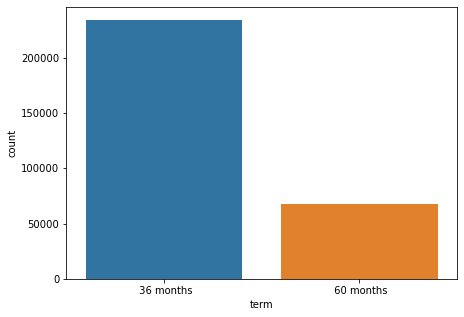

In [22]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

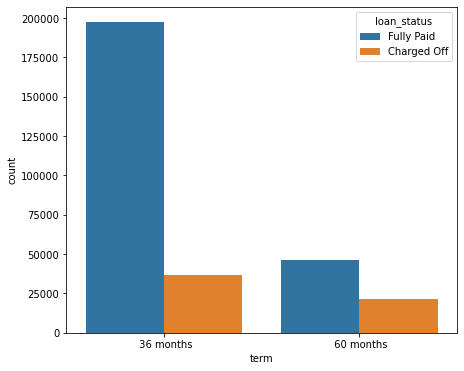

In [23]:
#Checking Loan_Status with Term to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for each of the 2 categories of "term" variable.

In [24]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)
#Observation - People who take a 60 months term loan are more likely to default.

term,36 months,60 months
loan_status,,
Charged Off,16.0,32.0
Fully Paid,84.0,68.0


In [25]:
# Since the charged_off probability is different for the 2 "term" categories,therefore "term" could be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 4) Interest_Rate

In [26]:
variable='int_rate'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 565 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 559


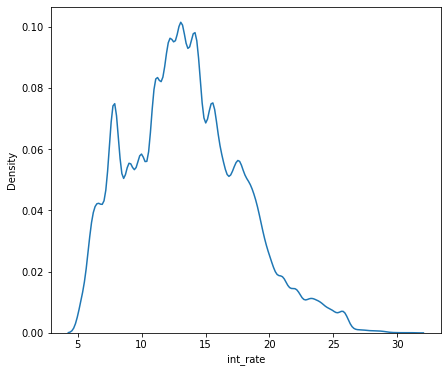

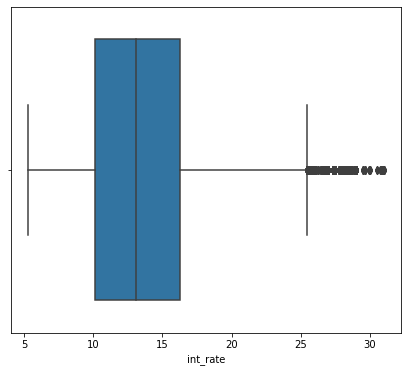

In [27]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks little right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#Data has few outliers

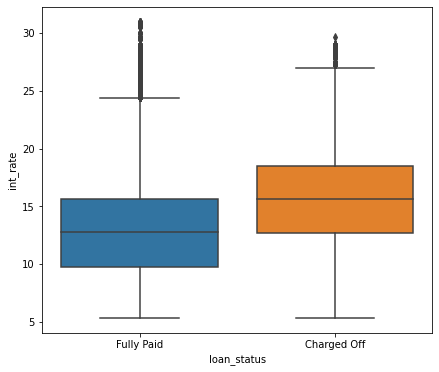

In [28]:
#Checking Loan_Status with Interest_Rate to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median interest_rate is higher for charged off loans in comparison to fully_paid loans.

In [29]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean interest_rate is also higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    15.738901
Fully Paid     12.974179
Name: int_rate, dtype: float64

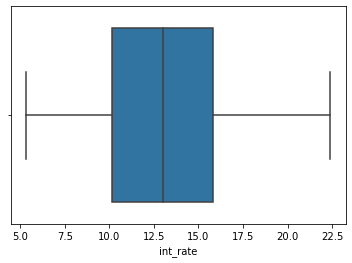

In [30]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

In [31]:
# Since mean and median int_rate is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 5) Installment_Amount

In [32]:
variable='installment'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 45626 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 45556


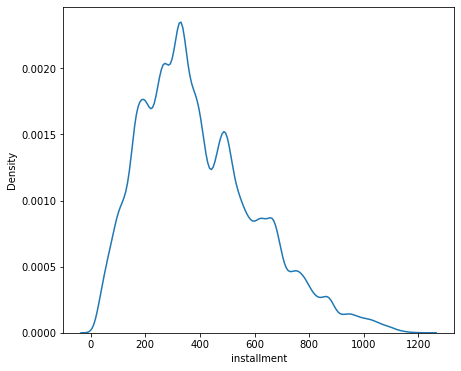

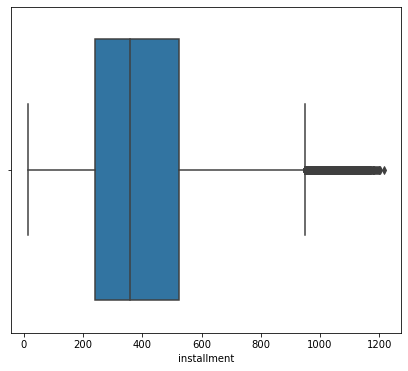

In [33]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

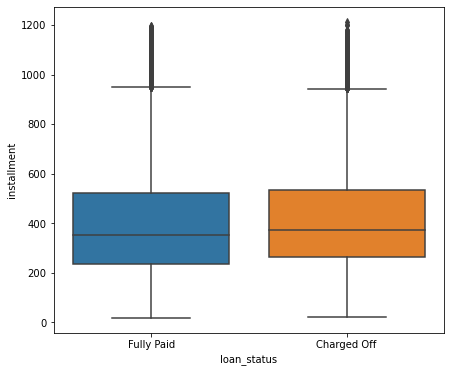

In [34]:
#Checking Loan_Status with Installment_Amount to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median installment_amount is little higher for charged off loans in comparison to fully_paid loans.

In [35]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean installment_amount is also a little higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    409.530808
Fully Paid     395.205656
Name: installment, dtype: float64

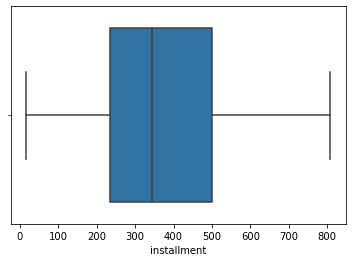

In [36]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

In [37]:
# Since mean and median loan_amount is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 6) Grade

In [38]:
variable='grade'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 7 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 7


B    31.0
C    28.0
A    17.0
D    16.0
E     7.0
F     0.0
G     0.0
Name: grade, dtype: float64


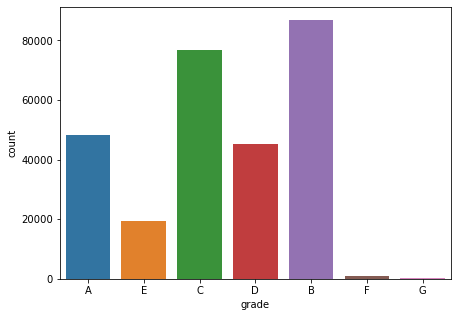

In [39]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

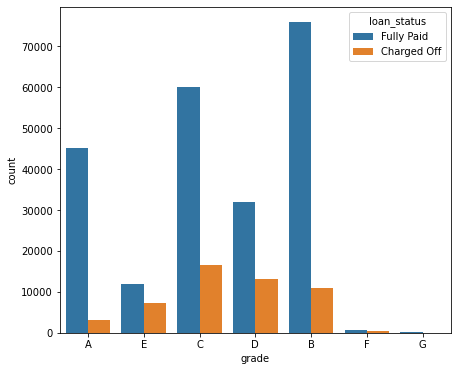

In [40]:
#Checking Loan_Status with Grade to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see the difference in the ratio for fully_paid to charged_off for each category of "Grade" variable.

In [41]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)
#Observation - We can see that the charged off probability increases with change in Grade.

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,6.0,13.0,22.0,29.0,38.0,37.0,28.0
Fully Paid,94.0,87.0,78.0,71.0,62.0,63.0,72.0


In [42]:
# Since the charged_off probability is different for the "Grade" categories,therefore "Grade" could be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 7) Sub_Grade

In [43]:
variable= 'sub_grade'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 35 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 35


In [44]:
# Lets have a look at the relation of "Grade" with "SubGrade"
pd.crosstab(df_train[variable],df_train['grade'])
# We observe that the first letter of SubGrade is actually the grade.
# So we can ignore the first letter.

grade,A,B,C,D,E,F,G
sub_grade,,,,,,,
A1,7529,0,0,0,0,0,0
A2,7351,0,0,0,0,0,0
A3,7962,0,0,0,0,0,0
A4,11708,0,0,0,0,0,0
A5,13750,0,0,0,0,0,0
B1,0,14470,0,0,0,0,0
B2,0,16905,0,0,0,0,0
B3,0,20124,0,0,0,0,0
B4,0,18947,0,0,0,0,0


In [45]:
#Extracting only the second letter from grade column
df_train[variable]=df_train[variable].apply(lambda x : x[1])
df_train[variable].head()

0    4
1    1
2    3
3    1
4    5
Name: sub_grade, dtype: object

In [46]:
#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 5 unique values
# This is a categorical variable

Number of Unique Values - 5


4    20.0
1    20.0
3    20.0
2    20.0
5    19.0
Name: sub_grade, dtype: float64


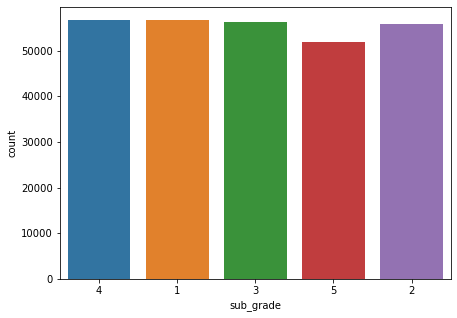

In [47]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()

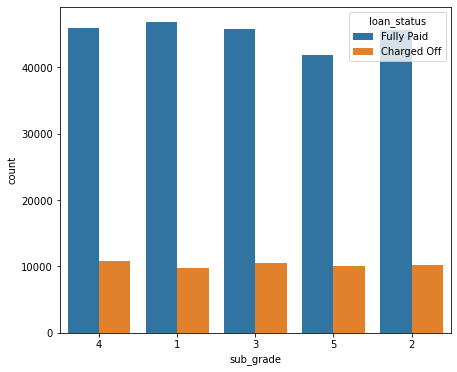

In [48]:
#Checking Loan_Status with Term to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see almomst same behavior for each of the categories of "sub_grade" variable.

In [49]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)
#Observation - The charged_off percentage remains almost same for each of the sub_grade categories. 

sub_grade,1,2,3,4,5
loan_status,,,,,
Charged Off,17.0,18.0,19.0,19.0,19.0
Fully Paid,83.0,82.0,81.0,81.0,81.0


In [50]:
#Since the charged_off probability is almost same for the "SubGrade" categories,"SubGrade" may not be an important feature.
#But since "sub-grade" feature can be combined with "grade" feature, therefore lets keep this feature.
#Since it is a categorical variable, therefore adding it to the categorical_columns variable.

categorical_columns.append(variable)

In [51]:
#Doing same change for test data
#Extracting only the second letter from grade column
df_test[variable]=df_test[variable].apply(lambda x : x[1])
df_test[variable].head()

0    4
1    4
2    1
3    3
4    1
Name: sub_grade, dtype: object

### 8) Employee_Title

In [52]:
variable='emp_title'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 129430 unique values

#Checking few unique values
df[variable].unique()[:15]
# This is a categorical variable having lots of categories. So we can drop this column.

Number of Null Values - 16343
Number of Unique Values - 129424


array(['Marketing', 'Credit analyst ', 'Statistician', 'Client Advocate',
       'Destiny Management Inc.', 'HR Specialist',
       'Software Development Engineer', 'Office Depot',
       'Application Architect', 'Regado Biosciences', 'Sodexo',
       'Director Bureau of Equipment Inventory',
       'Social Work/Care Manager', 'Regional Counsel',
       'Pullman Regional Hospital'], dtype=object)

In [53]:
df_train.drop(columns='emp_title',inplace=True)
df_test.drop(columns='emp_title',inplace=True)
print(df_train.shape,df_test.shape)

(277317, 26) (79206, 26)


### 9) Employee_Length

In [54]:
variable= 'emp_length'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 11 unique values
# This is a categorical variable

print(df[variable].unique())
#We can encode these categories.

Number of Null Values - 13341
Number of Unique Values - 11
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


10+ years    33.0
2 years      10.0
< 1 year      9.0
3 years       9.0
5 years       7.0
1 year        7.0
4 years       6.0
6 years       6.0
7 years       6.0
8 years       5.0
9 years       4.0
Name: emp_length, dtype: float64


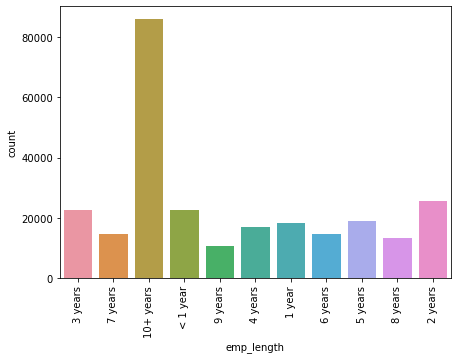

In [55]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.xticks(rotation=90)
plt.show()
#Later we can encode this data.

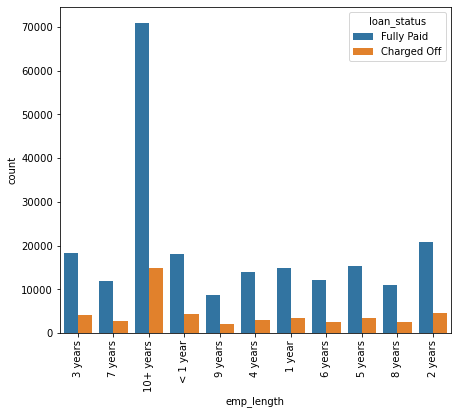

In [56]:
#Checking Loan_Status with Employee_Length feature to check if there is any relationship.
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.xticks(rotation=90)
plt.show()
#Observation - We can see different behavior for the categories of "Employee_Length" variable.

In [57]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,19.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,19.0,19.0,20.0
Fully Paid,81.0,83.0,82.0,82.0,82.0,82.0,82.0,82.0,81.0,81.0,80.0


In [58]:
#Since the charged_off probability is little different for the "Employee_Length" categories,it may be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 10) Home_Ownership

In [59]:
variable='home_ownership'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 6 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 6


MORTGAGE    49.0
RENT        42.0
OWN         10.0
OTHER        0.0
NONE         0.0
ANY          0.0
Name: home_ownership, dtype: float64


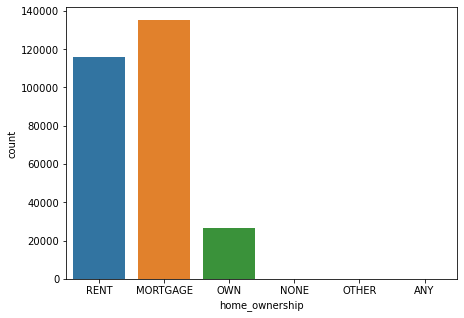

In [60]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

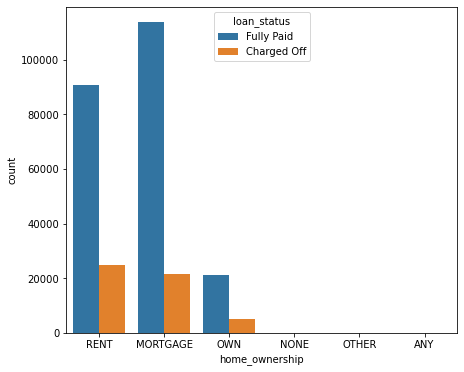

In [61]:
#Checking Loan_Status with Home_Ownership to check if there is any relationship.
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for the categories of "Home_Ownership" variable.

In [62]:
np.round(pd.crosstab(df['loan_status'],df[variable],normalize='columns')*100)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0.0,17.0,23.0,14.0,21.0,23.0
Fully Paid,100.0,83.0,77.0,86.0,79.0,77.0


In [63]:
# Since the charged_off probability is diffrent for "Home_Ownership" categories,itcould be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 11) Annual_Inc

In [64]:
variable= 'annual_inc'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 20381 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 20407


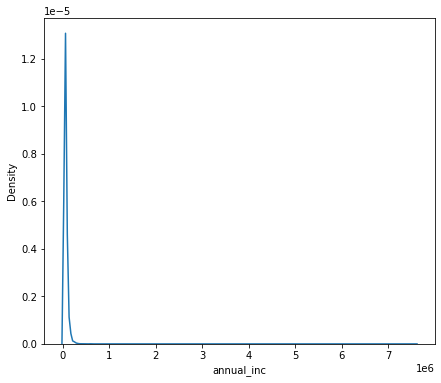

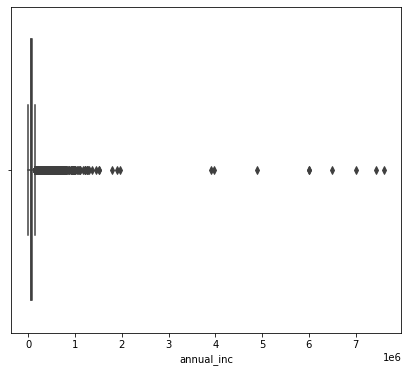

In [65]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks heavily right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

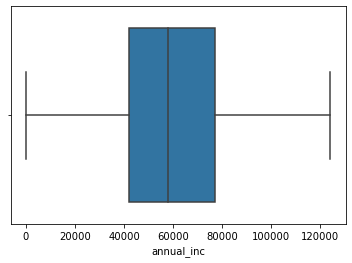

In [66]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

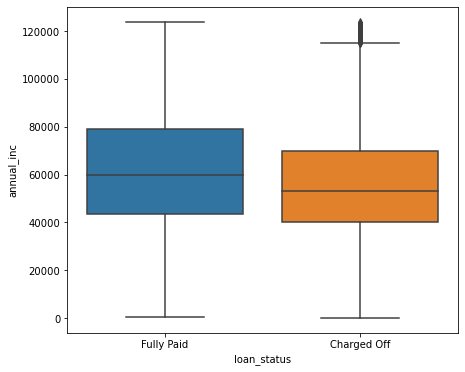

In [67]:
#Checking Loan_Status with Loan_Amount to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median loan_amount is higher for fully_paid loans in comparison to charged_off loans.

In [68]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean loan_amount is also higher for fully_paid loans in comparison to charged off loans.

loan_status
Charged Off    56691.768156
Fully Paid     62098.513881
Name: annual_inc, dtype: float64

In [69]:
# Since mean and median loan_amount is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 12) Verification_Status

In [70]:
variable='verification_status'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 3 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 3


Not Verified       36.0
Source Verified    33.0
Verified           31.0
Name: verification_status, dtype: float64


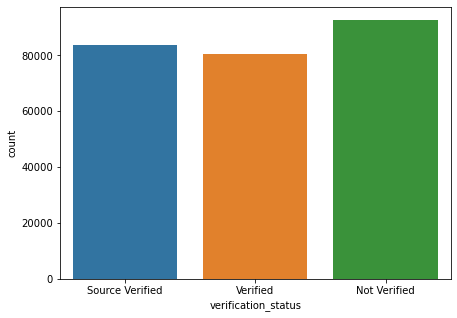

In [71]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

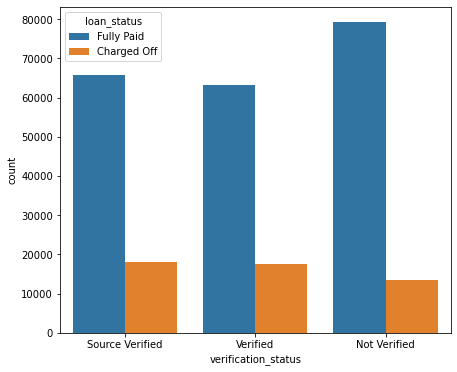

In [72]:
#Checking Loan_Status with verification_status to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for each of the 2 categories of "term" variable.

In [73]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,15.0,21.0,22.0
Fully Paid,85.0,79.0,78.0


In [74]:
# Since the charged_off probability is diffrent for "verification_status" categories, it could be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 13) Issue_d

In [75]:
variable='issue_d'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 115 unique values

#Checking few unique values
df_train[variable].unique()[:5]

Number of Null Values - 0
Number of Unique Values - 115


array(['Dec-2013', 'Jan-2013', 'May-2014', 'Sep-2015', 'Jan-2014'],
      dtype=object)

In [76]:
#Converting it to date_time format
df_train[variable]=pd.to_datetime(df_train[variable])
df_test[variable]=pd.to_datetime(df_test[variable])

### 14) Purpose

In [77]:
variable= 'purpose'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 14 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 14


debt_consolidation    59.0
credit_card           21.0
home_improvement       6.0
other                  5.0
major_purchase         2.0
car                    1.0
small_business         1.0
medical                1.0
moving                 1.0
vacation               1.0
wedding                0.0
house                  0.0
renewable_energy       0.0
educational            0.0
Name: purpose, dtype: float64


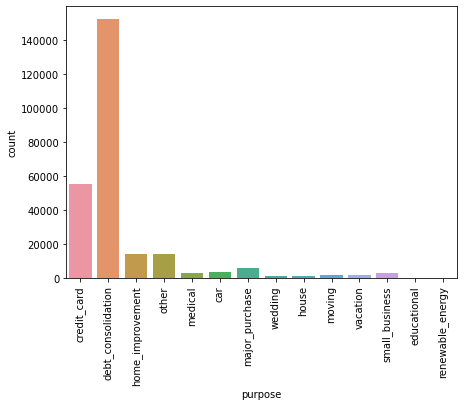

In [78]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.xticks(rotation=90)
plt.show()
#Later we can encode this data.

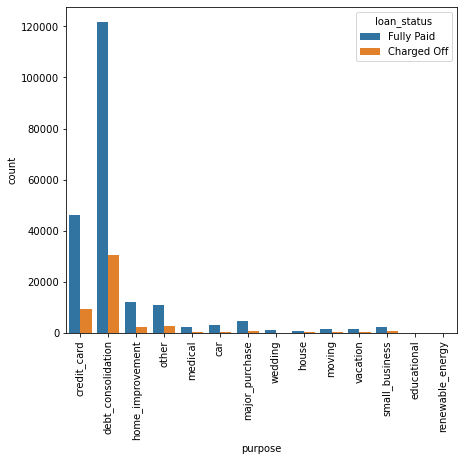

In [79]:
#Checking Loan_Status with purpose to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.xticks(rotation=90)
plt.show()
#Observation - We can see different behavior for the categories of "purpose" variable.

In [80]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,12.0,17.0,20.0,16.0,17.0,19.0,16.0,20.0,23.0,20.0,21.0,27.0,18.0,11.0
Fully Paid,88.0,83.0,80.0,84.0,83.0,81.0,84.0,80.0,77.0,80.0,79.0,73.0,82.0,89.0


In [81]:
# Since the charged_off probability is diffrent for "purpose" categories,therefore  itcould be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 15) Title

In [82]:
variable= 'title'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are 1059 null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 35144 unique values
# This is a continuous variable

Number of Null Values - 1060
Number of Unique Values - 35213


In [83]:
#Checking few values
df[variable].unique()[:10]
#Observation - We can drop this column since there are a lot of categories.

array(['Vacation', 'Debt consolidation', 'Credit card refinancing',
       'Credit Card Refinance', 'Home improvement',
       'No More Credit Cards', 'Debt Consolidation', 'Business',
       'Major purchase', 'Debt Consolidation/Home Repairs'], dtype=object)

In [84]:
df_train.drop(columns='title',inplace=True)
df_test.drop(columns='title',inplace=True)
print(df_train.shape,df_test.shape)

(257248, 25) (79206, 25)


### 16) DTI

In [85]:
variable= 'dti'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 4157 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 4163


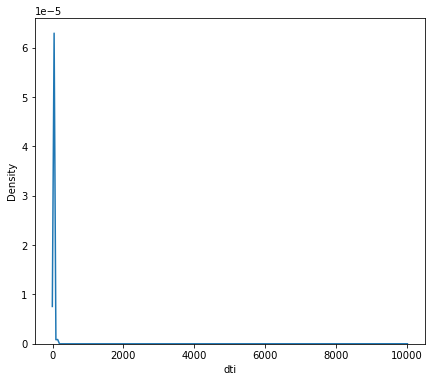

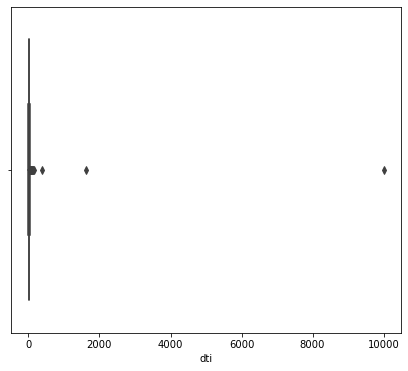

In [86]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

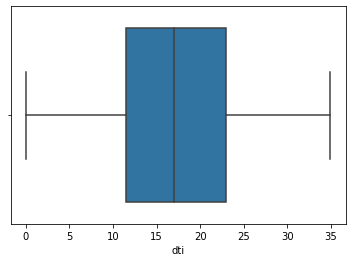

In [87]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

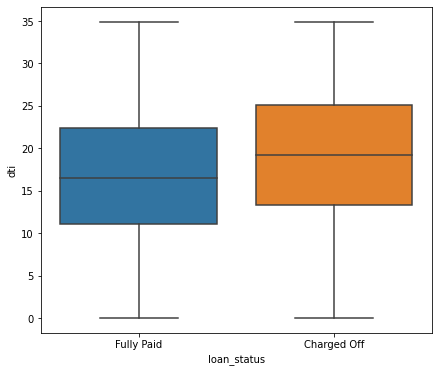

In [88]:
#Checking Loan_Status with dti to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median dti is higher for charged off loans in comparison to fully_paid loans.

In [89]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean dti is higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    19.141872
Fully Paid     16.867942
Name: dti, dtype: float64

In [90]:
# Since mean and median dti is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 17) Earliest_Cr_Line

In [91]:
variable='earliest_cr_line'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 666 unique values

Number of Null Values - 0
Number of Unique Values - 662


In [92]:
print(df_train[variable][:2])
#Converting to datetime format
df_train[variable]=pd.to_datetime(df_train[variable])
df_test[variable]=pd.to_datetime(df_test[variable])

0    Nov-2000
2    Sep-1999
Name: earliest_cr_line, dtype: object


### 18) Open_Acc

In [93]:
variable='open_acc'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 59 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 59


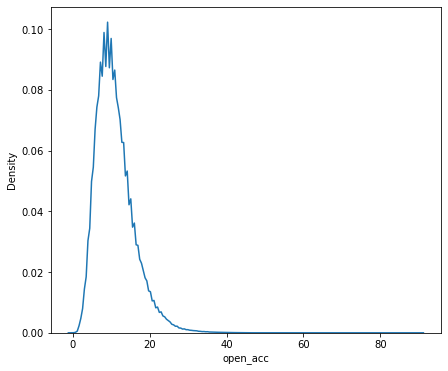

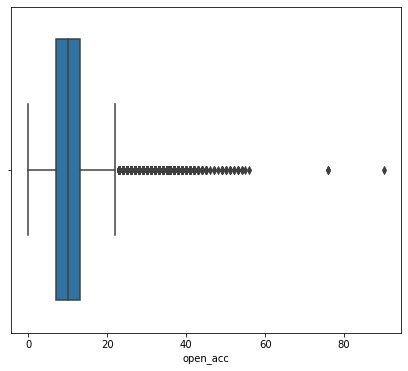

In [94]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

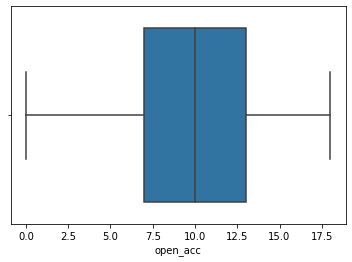

In [95]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

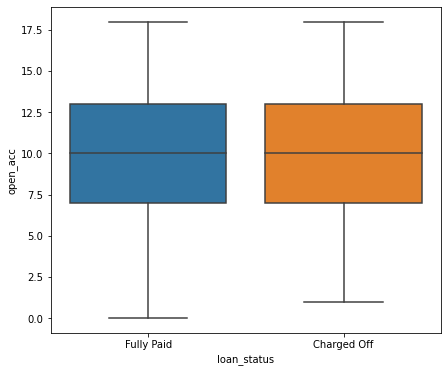

In [96]:
#Checking Loan_Status with Open_Acc to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median open_acc is almost same for charged off loans in comparison to fully_paid loans.

In [97]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean open_acc is almost same for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    10.165199
Fully Paid      9.961693
Name: open_acc, dtype: float64

In [98]:
# Since mean and median open_acc is almost same for different classes, therefore this feature can be ignored.

### 19) Pub_Rec

In [99]:
variable= 'pub_rec'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 17 unique values

Number of Null Values - 0
Number of Unique Values - 18


In [100]:
df_train[variable].unique()

array([ 0.,  1.,  6.,  2.,  3.,  5.,  4.,  7.,  8., 10., 11., 86.,  9.,
       19., 13., 15., 12., 24.])

In [101]:
df_train[variable].value_counts()

0.0     197704
1.0      31493
2.0       3358
3.0        861
4.0        295
5.0        121
6.0         55
7.0         26
8.0         19
11.0         6
10.0         6
9.0          5
19.0         2
12.0         2
86.0         1
13.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [102]:
#Creating flag for this feature
df_train.loc[df_train[variable]<=1,variable]=0
df_train.loc[df_train[variable]>1,variable]=1
df_test.loc[df_test[variable]<=1,variable]=0
df_test.loc[df_test[variable]>1,variable]=1

In [103]:
df_train[variable].value_counts()

0.0    229197
1.0      4760
Name: pub_rec, dtype: int64

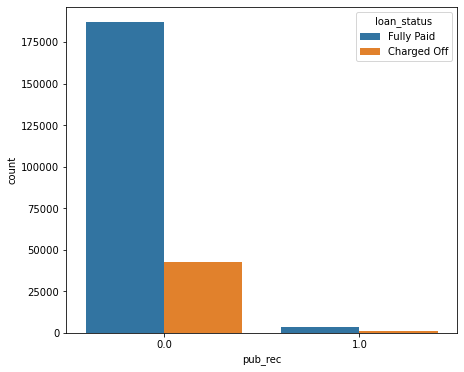

In [104]:
#Checking Loan_Status with pub_rec to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for the categories of "pub_rec" variable.

In [105]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

pub_rec,0.0,1.0
loan_status,,
Charged Off,18.0,22.0
Fully Paid,82.0,78.0


In [106]:
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 20) Revol_Bal

In [107]:
variable= 'revol_bal'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 39632 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 39541


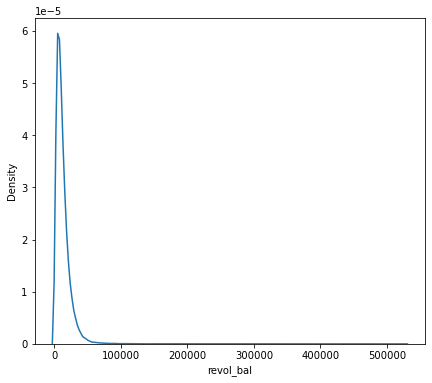

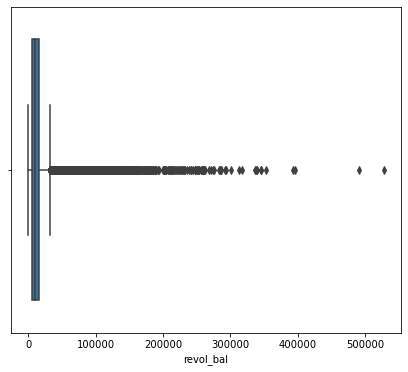

In [108]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

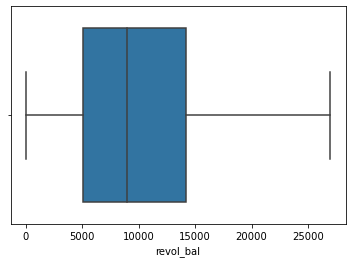

In [109]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

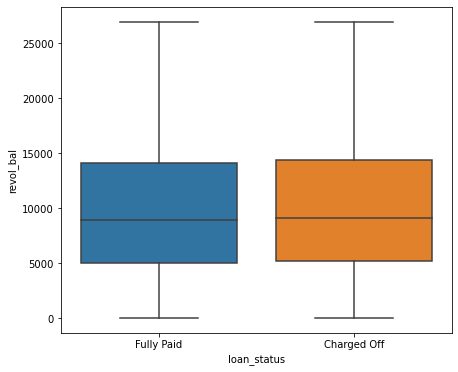

In [110]:
#Checking Loan_Status with revol_bal to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median revol_bal is almost same for charged off loans in comparison to fully_paid loans.

In [111]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean revol_bal is higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    10190.947523
Fully Paid     10032.238462
Name: revol_bal, dtype: float64

In [112]:
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 21) Revol_Util

In [113]:
variable= 'revol_util'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 1154 unique values
# This is a continuous variable

Number of Null Values - 154
Number of Unique Values - 1157


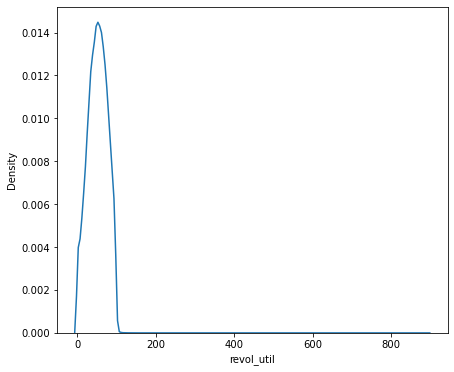

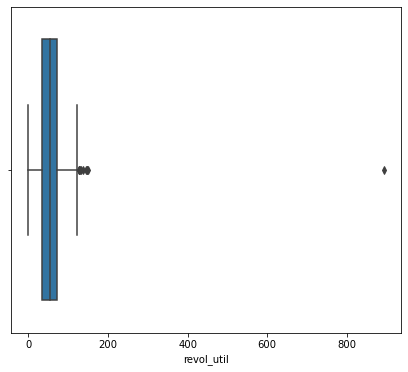

In [114]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

In [115]:
#Sincce there are null values, and distribution is right skewed, therefore using median imputation.
median_revol_util=df_train[variable].median()
median_revol_util
df_train[variable].fillna(median_revol_util,inplace=True)

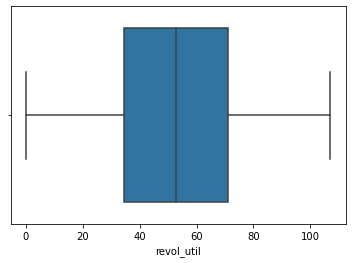

In [116]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

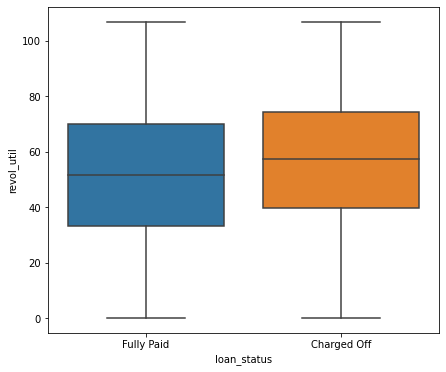

In [117]:
#Checking Loan_Status with Loan_Amount to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median revol_util is higher for charged off loans in comparison to fully_paid loans.

In [118]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean revol_util is higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    56.297562
Fully Paid     51.318292
Name: revol_util, dtype: float64

In [119]:
# Since mean and median revol_util is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 22) Total_Acc

In [120]:
variable='total_acc'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 94 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 95


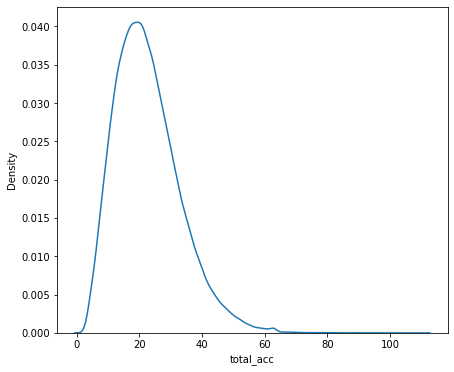

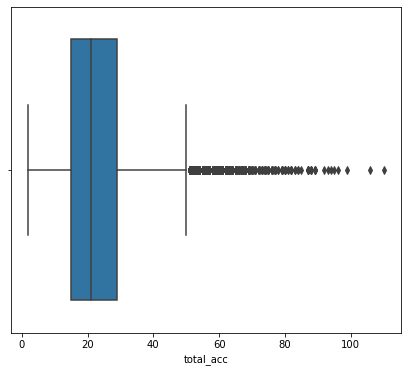

In [121]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

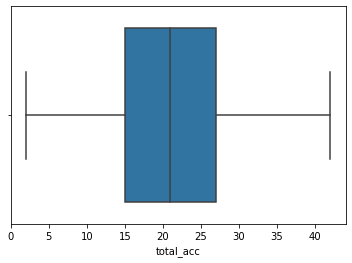

In [122]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
# The outliers have been removed

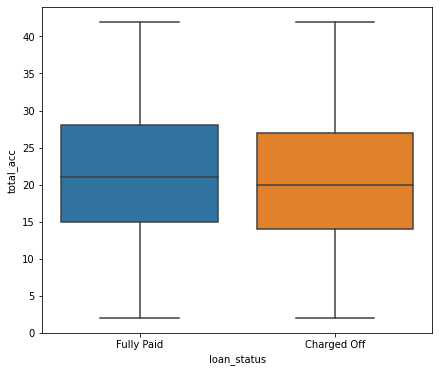

In [123]:
#Checking Loan_Status with total_acc to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median total_acc is higher for fully_paid loans.

In [124]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean total_acc is higher for fully_paid loans.

loan_status
Charged Off    20.892729
Fully Paid     21.489676
Name: total_acc, dtype: float64

In [125]:
# Since mean and median total_acc is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

### 23) Initial_List_Status

In [126]:
variable= 'initial_list_status'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 2 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 2


f    62.0
w    38.0
Name: initial_list_status, dtype: float64


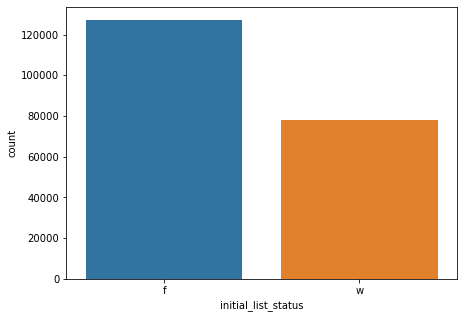

In [127]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

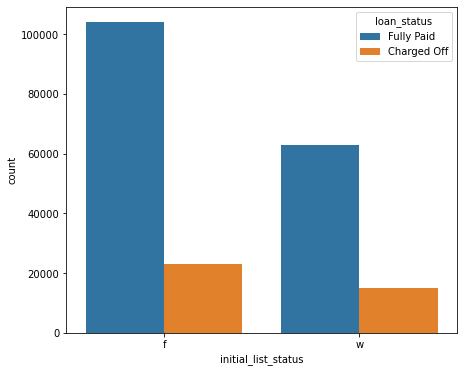

In [128]:
#Checking Loan_Status with Initial_List_Status to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for each of the 2 categories.

In [129]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

initial_list_status,f,w
loan_status,,
Charged Off,18.0,19.0
Fully Paid,82.0,81.0


In [130]:
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 24) Application_Type

In [131]:
variable= 'application_type'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 3 unique values
# This is a categorical variable

Number of Null Values - 0
Number of Unique Values - 3


INDIVIDUAL    100.0
JOINT           0.0
DIRECT_PAY      0.0
Name: application_type, dtype: float64


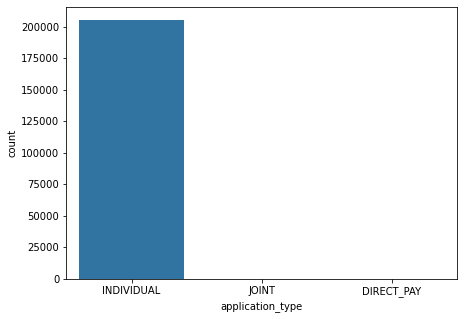

In [132]:
#Checking the percentage of occurence of each of the categories.
print(np.round(df_train[variable].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train[variable])
plt.show()
#Later we can encode this data.

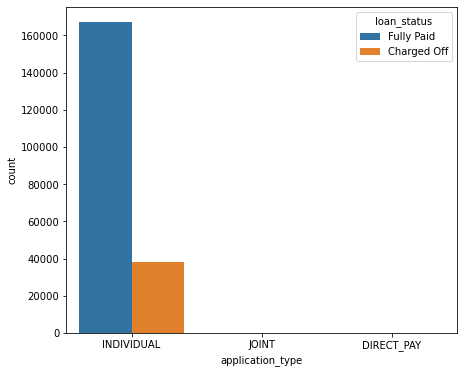

In [133]:
#Checking Loan_Status with application_type to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()

In [134]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)
#Observation - Different charged_off percentage for different categories.

application_type,DIRECT_PAY,INDIVIDUAL,JOINT
loan_status,,,
Charged Off,60.0,19.0,15.0
Fully Paid,40.0,81.0,85.0


In [135]:
# Since the charged_off probability is different for the categories,therefore it could be an important feature.
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 25) Mort_Acc

In [136]:
variable=  'mort_acc'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are 23018 null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 22 unique values

Number of Null Values - 23018
Number of Unique Values - 22


In [137]:
df_train[variable].unique()

array([ 2.,  0.,  3.,  1., nan,  4.,  5.,  9.,  7.,  6.,  8., 10., 11.,
       14., 13., 12., 21., 19., 17., 25., 16., 15., 18.])

In [138]:
#Since there are null values, therefore using mode imputation.
mode_more_acc=df_train[variable].mode()
df_train[variable].fillna(mode_more_acc[0],inplace=True)

In [139]:
df_train[variable].value_counts()

0.0     106905
1.0      32562
2.0      23985
3.0      16729
4.0      11055
5.0       6634
6.0       3792
7.0       1927
8.0        942
9.0        441
10.0       214
11.0        98
12.0        56
13.0        25
14.0        17
16.0         7
19.0         3
17.0         2
15.0         2
21.0         1
25.0         1
18.0         1
Name: mort_acc, dtype: int64

In [140]:
#Creating flag for this feature
df_train.loc[df_train[variable]<=1,variable]=0
df_train.loc[df_train[variable]>1,variable]=1
df_test.loc[df_test[variable]<=1,variable]=0
df_test.loc[df_test[variable]>1,variable]=1

In [141]:
df_train[variable].value_counts()

0.0    139467
1.0     65932
Name: mort_acc, dtype: int64

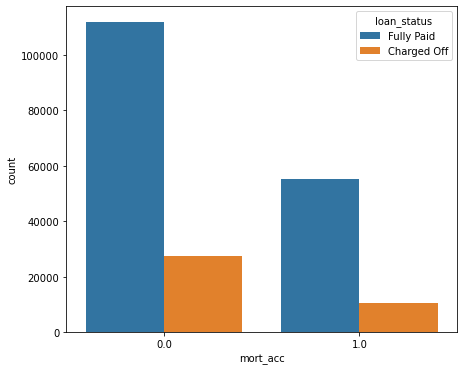

In [142]:
#Checking Loan_Status with mort_acc to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for the categories of "pub_rec" variable.

In [143]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

mort_acc,0.0,1.0
loan_status,,
Charged Off,20.0,16.0
Fully Paid,80.0,84.0


In [144]:
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 26) Pub_Rec_Bankruptcies

In [145]:
variable='pub_rec_bankruptcies'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are 325 null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 8 unique values
# This is a categorical variable

Number of Null Values - 325
Number of Unique Values - 8


In [146]:
df_train[variable].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  7.,  5.,  6.])

In [147]:
#Since there are null values, therefore using mode imputation.
mode_pub_rec_bankruptcies=df_train[variable].mode()
df_train[variable].fillna(mode_pub_rec_bankruptcies[0],inplace=True)

In [148]:
df_train[variable].value_counts()

0.0    178604
1.0     25405
2.0      1115
3.0       208
4.0        44
5.0        19
6.0         3
7.0         1
Name: pub_rec_bankruptcies, dtype: int64

In [149]:
#Creating flag for this feature
df_train.loc[df_train[variable]<=1,variable]=0
df_train.loc[df_train[variable]>1,variable]=1
df_test.loc[df_test[variable]<=1,variable]=0
df_test.loc[df_test[variable]>1,variable]=1

In [150]:
df_train[variable].value_counts()

0.0    204009
1.0      1390
Name: pub_rec_bankruptcies, dtype: int64

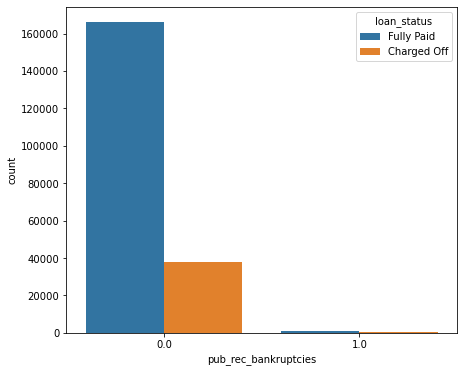

In [151]:
#Checking Loan_Status with pub_rec_bankruptcies to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x=variable,hue='loan_status')
plt.show()
#Observation - We can see different behavior for the categories of "pub_rec" variable.

In [152]:
np.round(pd.crosstab(df_train['loan_status'],df_train[variable],normalize='columns')*100)

pub_rec_bankruptcies,0.0,1.0
loan_status,,
Charged Off,19.0,22.0
Fully Paid,81.0,78.0


In [153]:
# Since it is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append(variable)

### 27) Address

In [154]:
variable='address'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 293340 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 204701


In [155]:
#Checking 1 address
df_train.loc[199642,variable]
#We can extract the pin code and state from the address.

'1778 Spencer Flats Suite 111\r\nWest Crystal, WV 22690'

### Feature Engineering

In [156]:
#Extracting Pin Code and State From Address.
df_train['Pin_Code']=df_train[variable].apply(lambda x : x.split()[-1])
df_train['State']=df_train[variable].apply(lambda x : x.split()[-2])
df_test['Pin_Code']=df_test[variable].apply(lambda x : x.split()[-1])
df_test['State']=df_test[variable].apply(lambda x : x.split()[-2])

70466    14.0
22690    14.0
30723    14.0
48052    14.0
00813    12.0
05113    12.0
29597    12.0
11650     3.0
86630     3.0
93700     3.0
Name: Pin_Code, dtype: float64


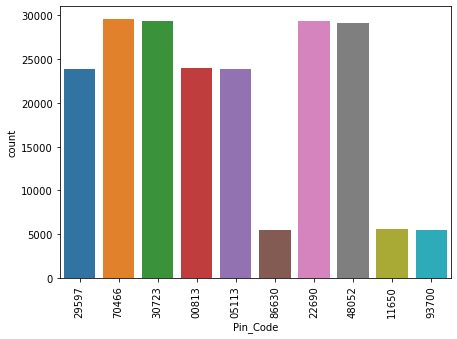

In [157]:
#Checking the percentage of occurence of each of the categories of "Pin_Code".
print(np.round(df_train['Pin_Code'].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train['Pin_Code'])
plt.xticks(rotation=90)
plt.show()
#Later we can encode this data.

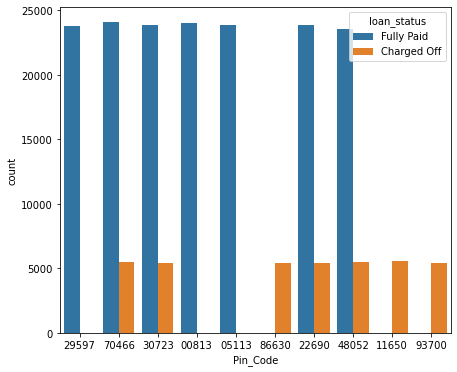

In [158]:
#Checking Loan_Status with Pin_Code to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x='Pin_Code',hue='loan_status')
plt.show()

In [159]:
np.round(pd.crosstab(df_train['loan_status'],df_train['Pin_Code'],normalize='columns')*100)

Pin_Code,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
loan_status,,,,,,,,,,
Charged Off,0.0,0.0,100.0,19.0,0.0,19.0,19.0,19.0,100.0,100.0
Fully Paid,100.0,100.0,0.0,81.0,100.0,81.0,81.0,81.0,0.0,0.0


In [160]:
# Since "Pin_Code" is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append('Pin_Code')

AP    4.0
AE    4.0
AA    3.0
CT    2.0
WI    2.0
SC    2.0
MA    2.0
ME    2.0
WY    2.0
MD    2.0
ID    2.0
AL    2.0
NJ    2.0
NE    2.0
GA    2.0
TX    2.0
VT    2.0
AK    2.0
IN    2.0
AR    2.0
RI    2.0
IL    2.0
NV    2.0
MT    2.0
MS    2.0
DC    2.0
LA    2.0
MO    2.0
MN    2.0
SD    2.0
NH    2.0
CO    2.0
VA    2.0
DE    2.0
FL    2.0
KS    2.0
KY    2.0
OH    2.0
OK    2.0
MI    2.0
WV    2.0
OR    2.0
NC    2.0
WA    2.0
AZ    2.0
ND    2.0
UT    2.0
HI    2.0
TN    2.0
CA    2.0
IA    2.0
PA    2.0
NM    2.0
NY    2.0
Name: State, dtype: float64


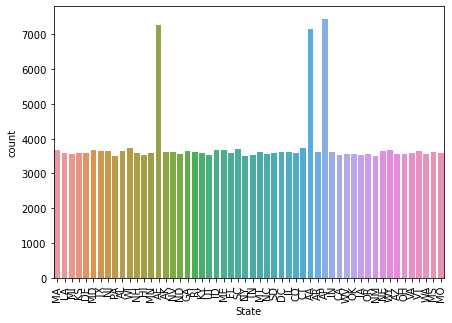

In [161]:
#Checking the percentage of occurence of each of the categories of "State".
print(np.round(df_train['State'].value_counts(normalize=True)*100))

plt.figure(figsize=(7,5))
sns.countplot(df_train['State'])
plt.xticks(rotation=90)
plt.show()
#Later we can encode this data.

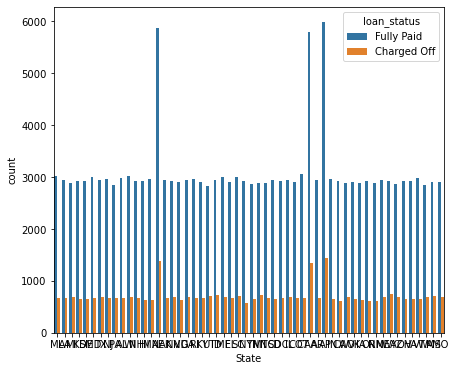

In [162]:
#Checking Loan_Status with Pin_Code to check if there is any relationship
plt.figure(figsize=(7,6))
sns.countplot(data=df_train,x='State',hue='loan_status')
plt.show()

In [163]:
np.round(pd.crosstab(df_train['loan_status'],df_train['State'],normalize='columns')*100)

State,AA,AE,AK,AL,AP,AR,AZ,CA,CO,CT,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,19.0,19.0,19.0,19.0,19.0,19.0,19.0,17.0,19.0,18.0,...,18.0,19.0,19.0,20.0,18.0,18.0,19.0,19.0,19.0,20.0
Fully Paid,81.0,81.0,81.0,81.0,81.0,81.0,81.0,83.0,81.0,82.0,...,82.0,81.0,81.0,80.0,82.0,82.0,81.0,81.0,81.0,80.0


In [164]:
# Since "State" is a categorical variable, therefore adding it to the categorical_columns variable.
categorical_columns.append('State')

In [165]:
#Dropping Address column
df_train.drop(columns='address',inplace=True)

In [166]:
df_train.shape

(205399, 26)

### Interval - Number Of days between issue_date and earliest_cr_line

In [167]:
# earliest_cr_line :The month the borrower's earliest reported credit line was opened
# issue_d : The month which the loan was funded
(df_train['issue_d']-df_train['earliest_cr_line'])

0        4778 days
2        4871 days
3        6270 days
4        6909 days
5        5236 days
            ...   
316818   4291 days
316819   3103 days
316820   2740 days
316821   3468 days
316823   2434 days
Length: 205399, dtype: timedelta64[ns]

In [168]:
df_train['interval']=(df_train['issue_d']-df_train['earliest_cr_line']).dt.days
df_test['interval']=(df_test['issue_d']-df_test['earliest_cr_line']).dt.days

In [169]:
variable='interval'
#Checking for null values
print('Number of Null Values -',df_train[variable].isna().sum())
#There are no null values

#Checking for number of unique values
print('Number of Unique Values -',df_train[variable].nunique())
#There are 2234 unique values
# This is a continuous variable

Number of Null Values - 0
Number of Unique Values - 2300


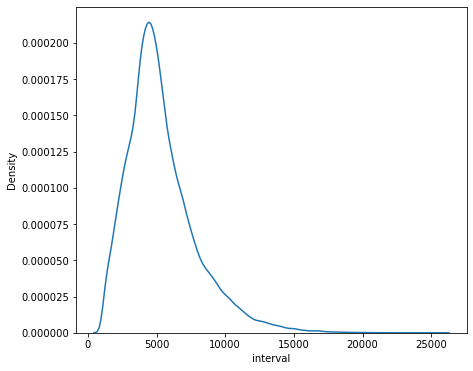

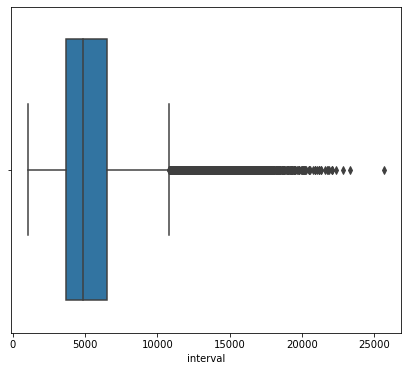

In [170]:
plt.figure(figsize=(7,6))
sns.kdeplot(df_train[variable])
plt.show()
#Data looks right skewed

plt.figure(figsize=(7,6))
sns.boxplot(df_train[variable])
plt.show()
#There are few outliers in the data

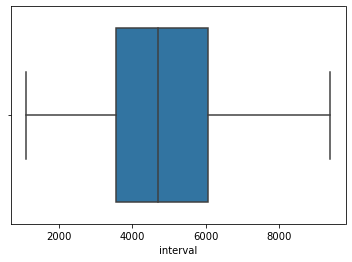

In [171]:
#Removing the outliers
q75=np.percentile(df_train[variable],75)
q25=np.percentile(df_train[variable],25)
iqr=q75-q25
sns.boxplot(df_train.loc[df_train[variable]<iqr+q75,variable])
plt.show()
df_train=df_train.loc[df_train[variable]<iqr+q75]
#The outliers have been removed

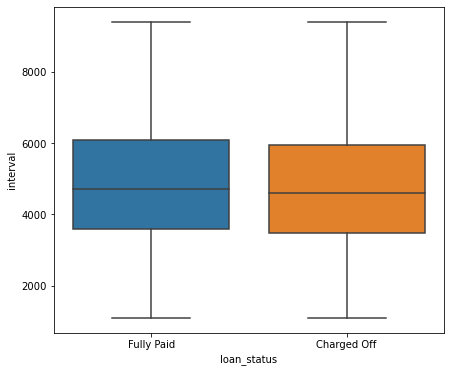

In [172]:
#Checking Loan_Status with Loan_Amount to check if there is any relationship
plt.figure(figsize=(7,6))
sns.boxplot(data=df_train,y=variable,x='loan_status')
plt.show()
#Observation - The median loan_amount is higher for charged off loans in comparison to fully_paid loans.

In [173]:
df_train.groupby(by='loan_status').mean()[variable]
#Observation - The mean loan_amount is higher for charged off loans in comparison to fully_paid loans.

loan_status
Charged Off    4765.899567
Fully Paid     4885.571776
Name: interval, dtype: float64

In [174]:
# Since mean and median loan_amount is different for different classes, therefore it could be an important feature.
# Since it is a continuous variable, therefore adding it to the continuous_columns variable.
continuous_columns.append(variable)

In [175]:
### Dropping "issue_date" and "earliest_cr_line" columns
df_train.drop(columns=['issue_d','earliest_cr_line'],inplace=True)
df_test.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

### Final Dataset


In [176]:
y_train=df_train['loan_status']
df_train=df_train[categorical_columns+continuous_columns]
y_test=df_test['loan_status']
df_test=df_test[categorical_columns+continuous_columns]

In [177]:
df_train.shape

(190191, 23)

In [178]:
df_test.shape

(79206, 23)

### Descriptive Statistics

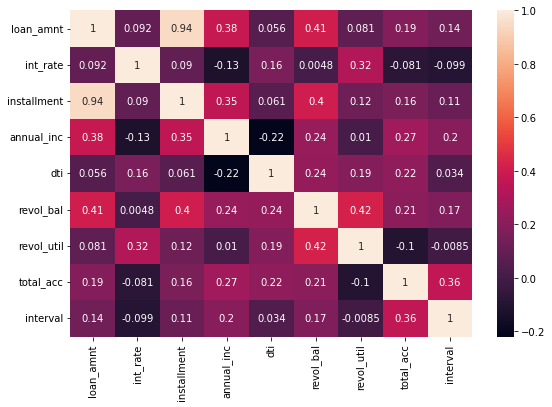

In [179]:
plt.figure(figsize=(9,6))
sns.heatmap(df_train[continuous_columns].corr(),annot=True)
plt.show()

In [180]:
#Continuous Variables Summary
df_train[continuous_columns].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,interval
count,190191.000000,190191.000000,190191.000000,190191.000000,190191.000000,190191.000000,190191.000000,190191.000000,190191.000000
mean,11308.507763,13.216712,348.357316,58122.886891,16.530831,9916.130842,52.769850,21.136079,4863.167726
std,5986.641419,3.871707,170.528153,23318.048798,7.705130,6304.195266,24.237657,8.649889,1841.887359
min,500.000000,5.320000,16.250000,4000.000000,0.000000,0.000000,0.000000,2.000000,1095.000000
25%,6550.000000,10.490000,217.660000,40000.000000,10.740000,5002.000000,35.000000,15.000000,3562.000000
50%,10000.000000,13.110000,328.060000,55000.000000,16.180000,8781.000000,53.500000,20.000000,4689.000000
75%,15000.000000,15.810000,466.150000,72500.000000,22.020000,13952.000000,71.500000,27.000000,6058.000000
max,31975.000000,22.400000,807.790000,123996.000000,34.940000,26972.000000,107.000000,42.000000,9405.000000


In [181]:
#Categorical Variables Summary
df_train[categorical_columns].describe(include='object').T

,count,unique,top,freq
term,190191,2,36 months,154323
grade,190191,7,B,60239
sub_grade,190191,5,4,39054
emp_length,182001,11,10+ years,52990
home_ownership,190191,6,RENT,89660
verification_status,190191,3,Not Verified,72259
purpose,190191,14,debt_consolidation,112123
initial_list_status,190191,2,f,118590
application_type,190191,3,INDIVIDUAL,190050
Pin_Code,190191,10,70466,27448


### Missing Value Treatment

In [182]:
#Checking for columns which have missing values
for column in df_train.columns:
    print(column,df_train[column].isna().sum())

term 0
grade 0
sub_grade 0
emp_length 8190
home_ownership 0
verification_status 0
purpose 0
pub_rec 0
initial_list_status 0
application_type 0
mort_acc 0
pub_rec_bankruptcies 0
Pin_Code 0
State 0
loan_amnt 0
int_rate 0
installment 0
annual_inc 0
dti 0
revol_bal 0
revol_util 0
total_acc 0
interval 0


In [183]:
# Checking emp_length variable
df_train['emp_length'].value_counts()

10+ years    52990
2 years      18464
3 years      16331
< 1 year     16270
5 years      13893
1 year       13412
4 years      12423
6 years      10657
7 years      10575
8 years       9527
9 years       7459
Name: emp_length, dtype: int64

In [184]:
# Imputing with Mode Value
df_train['emp_length'].fillna('10+ years',inplace=True)

In [185]:
df_train['emp_length'].isna().sum()
#All missing values imputed

0

### Imputing Test Dataset

In [186]:
df_test['emp_length'].fillna('10+ years',inplace=True)
df_test['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies[0],inplace=True)
df_test['revol_util'].fillna(median_revol_util,inplace=True)
df_test['mort_acc'].fillna(mode_more_acc[0],inplace=True)

In [187]:
df_test.isna().sum()

term                    0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
verification_status     0
purpose                 0
pub_rec                 0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
Pin_Code                0
State                   0
loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
revol_bal               0
revol_util              0
total_acc               0
interval                0
dtype: int64

### Scaling Continuous Variables

In [188]:
scaler=StandardScaler()
df_train_scaled=scaler.fit_transform(df_train[continuous_columns])
df_train_scaled=pd.DataFrame(data=df_train_scaled,columns=df_train[continuous_columns].columns)
df_test_scaled=scaler.transform(df_test[continuous_columns])
df_test_scaled=pd.DataFrame(data=df_test_scaled,columns=df_test[continuous_columns].columns)

In [189]:
df_train_scaled.shape

(190191, 9)

In [190]:
df_train.shape

(190191, 23)

### Encoding Categorical Variables

In [191]:
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'Pin_Code',
 'State']

In [192]:
#Term
print(df_train['term'].unique())
mapping={' 60 months':1,' 36 months':0}
df_train['term']=df_train['term'].map(mapping)
df_test['term']=df_test['term'].map(mapping)

[' 36 months' ' 60 months']


In [193]:
#grade
print(df_train['grade'].unique())
mapping={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df_train['grade']=df_train['grade'].map(mapping)
df_test['grade']=df_test['grade'].map(mapping)

['A' 'C' 'D' 'B' 'F' 'E' 'G']


In [194]:
#sub_grade
print(df_train['sub_grade'].unique())
df_train['sub_grade']=df_train['sub_grade'].astype('int')
df_test['sub_grade']=df_test['sub_grade'].astype('int')

['4' '3' '1' '5' '2']


In [195]:
#emp_length
print(df_train['emp_length'].unique())
mapping={'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,
         '6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
df_train['emp_length']=df_train['emp_length'].map(mapping)
df_test['emp_length']=df_test['emp_length'].map(mapping)

['3 years' '7 years' '10+ years' '< 1 year' '1 year' '6 years' '8 years'
 '4 years' '5 years' '9 years' '2 years']


In [196]:
#home_ownership
print(df_train['home_ownership'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
home_ownership_encoded=encoder.fit_transform(df_train[['home_ownership']]).toarray()
home_ownership_encoded_train=pd.DataFrame(data=home_ownership_encoded,columns=encoder.categories_)
home_ownership_encoded=encoder.fit_transform(df_test[['home_ownership']]).toarray()
home_ownership_encoded_test=pd.DataFrame(data=home_ownership_encoded,columns=encoder.categories_)

['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']


In [197]:
home_ownership_encoded_train.shape

(190191, 6)

In [198]:
#verification_status
print(df_train['verification_status'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
verification_status_encoded=encoder.fit_transform(df_train[['verification_status']]).toarray()
verification_status_train=pd.DataFrame(data=verification_status_encoded,columns=encoder.categories_)
verification_status_encoded=encoder.fit_transform(df_test[['verification_status']]).toarray()
verification_status_test=pd.DataFrame(data=verification_status_encoded,columns=encoder.categories_)

['Source Verified' 'Verified' 'Not Verified']


In [199]:
#purpose
print(df_train['purpose'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
purpose_encoded=encoder.fit_transform(df_train[['purpose']]).toarray()
purpose_train=pd.DataFrame(data=purpose_encoded,columns=encoder.categories_)
purpose_encoded=encoder.fit_transform(df_test[['purpose']]).toarray()
purpose_test=pd.DataFrame(data=purpose_encoded,columns=encoder.categories_)

['credit_card' 'debt_consolidation' 'home_improvement' 'medical' 'car'
 'major_purchase' 'wedding' 'house' 'moving' 'other' 'vacation'
 'small_business' 'educational' 'renewable_energy']


In [200]:
#pub_rec
print(df_train['pub_rec'].unique())
df_train.loc[df_train['pub_rec']=='6+','pub_rec']=7
df_test.loc[df_test['pub_rec']=='6+','pub_rec']=7

[0. 1.]


In [201]:
#initial_list_status
print(df_train['initial_list_status'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
initial_list_status_encoded=encoder.fit_transform(df_train[['application_type']]).toarray()
initial_list_status_train=pd.DataFrame(data=initial_list_status_encoded,columns=encoder.categories_)
initial_list_status_encoded=encoder.fit_transform(df_test[['application_type']]).toarray()
initial_list_status_test=pd.DataFrame(data=initial_list_status_encoded,columns=encoder.categories_)

['f' 'w']


In [202]:
#application_type
print(df_train['application_type'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
application_type_encoded=encoder.fit_transform(df_train[['application_type']]).toarray()
application_type_train=pd.DataFrame(data=application_type_encoded,columns=encoder.categories_)
application_type_encoded=encoder.fit_transform(df_test[['application_type']]).toarray()
application_type_test=pd.DataFrame(data=application_type_encoded,columns=encoder.categories_)

['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


In [203]:
#pub_rec_bankruptcies
print(df_train['pub_rec_bankruptcies'].unique())
# This categorical feature is already encoded and looks fine.

[0. 1.]


In [204]:
#Pin_Code
print(df_train['Pin_Code'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
pincode_encoded=encoder.fit_transform(df_train[['Pin_Code']]).toarray()
pincode_train=pd.DataFrame(data=pincode_encoded,columns=encoder.categories_)
pincode_encoded=encoder.fit_transform(df_test[['Pin_Code']]).toarray()
pincode_test=pd.DataFrame(data=pincode_encoded,columns=encoder.categories_)

['29597' '70466' '30723' '00813' '86630' '22690' '48052' '05113' '11650'
 '93700']


In [205]:
#State
print(df_train['State'].unique())
#Using One Hot Encoding Encoder
encoder=OneHotEncoder()
State_encoded=encoder.fit_transform(df_train[['State']]).toarray()
State_train=pd.DataFrame(data=State_encoded,columns=encoder.categories_)
State_encoded=encoder.fit_transform(df_test[['State']]).toarray()
State_test=pd.DataFrame(data=State_encoded,columns=encoder.categories_)

['MA' 'LA' 'MI' 'KS' 'DE' 'MD' 'TX' 'NJ' 'PA' 'AL' 'WI' 'NH' 'HI' 'AK'
 'NV' 'AE' 'ND' 'RI' 'KY' 'UT' 'ID' 'MN' 'GA' 'ME' 'FL' 'NY' 'TN' 'MT'
 'SD' 'DC' 'IL' 'CO' 'CT' 'AA' 'AP' 'IN' 'CA' 'WV' 'NC' 'OK' 'AR' 'IA'
 'OR' 'NM' 'NE' 'WY' 'AZ' 'OH' 'VT' 'VA' 'WA' 'SC' 'MO' 'MS']


In [206]:
#Encoding Target Variable
y_train.value_counts()
mapping={'Fully Paid':1,'Charged Off':0}
y_train=y_train.map(mapping)
y_test=y_test.map(mapping)

In [207]:
### Final Check For Missing Values in Train Data
for column in df_train.columns:
    print(column,df_train[column].isna().sum())

term 0
grade 0
sub_grade 0
emp_length 0
home_ownership 0
verification_status 0
purpose 0
pub_rec 0
initial_list_status 0
application_type 0
mort_acc 0
pub_rec_bankruptcies 0
Pin_Code 0
State 0
loan_amnt 0
int_rate 0
installment 0
annual_inc 0
dti 0
revol_bal 0
revol_util 0
total_acc 0
interval 0


In [208]:
### Final Check For Missing Values in Test Data
for column in df_test.columns:
    print(column,df_test[column].isna().sum())

term 0
grade 0
sub_grade 0
emp_length 0
home_ownership 0
verification_status 0
purpose 0
pub_rec 0
initial_list_status 0
application_type 0
mort_acc 0
pub_rec_bankruptcies 0
Pin_Code 0
State 0
loan_amnt 0
int_rate 0
installment 0
annual_inc 0
dti 0
revol_bal 0
revol_util 0
total_acc 0
interval 0


In [209]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [210]:
### Combining all one hot encoded categorical columns in train_dataset and test_dataset
train_onehotencoded_columns=pd.concat((home_ownership_encoded_train,verification_status_train,purpose_train,
                                 initial_list_status_train,application_type_train,pincode_train,State_train),axis=1)
test_onehotencoded_columns=pd.concat((home_ownership_encoded_test,verification_status_test,purpose_test,
                                 initial_list_status_test,application_type_test,pincode_test,State_test),axis=1)

In [211]:
### Combining all categorical columns in train_dataset and test_dataset
train_categorical=pd.concat((df_train[['term','grade','sub_grade','emp_length','pub_rec','pub_rec_bankruptcies']],
                             train_onehotencoded_columns),axis=1)
test_categorical=pd.concat((df_test[['term','grade','sub_grade','emp_length','pub_rec','pub_rec_bankruptcies']],
                             test_onehotencoded_columns),axis=1)

In [212]:
### Combining continuous and categorical columns in train_dataset and test_dataset
df_train=pd.concat((df_train[continuous_columns],train_categorical),axis=1)
df_test=pd.concat((df_test[continuous_columns],test_categorical),axis=1)

In [213]:
print(df_train.shape,df_test.shape)

(190191, 108) (79206, 108)


### Fitting The Logistic Regression Model

In [214]:
model=LogisticRegression()
model.fit(df_train,y_train)
y_pred=model.predict(df_test)
y_pred_proba=model.predict_proba(df_test)

In [215]:
# Model Coefficients
coefficients=pd.DataFrame(data=model.coef_,columns=df_train.columns)
coefficients

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,interval,term,...,"(SD,)","(TN,)","(TX,)","(UT,)","(VA,)","(VT,)","(WA,)","(WI,)","(WV,)","(WY,)"
0,-0.000132,-0.024731,0.003395,0.00002,-0.005697,0.000001,0.001411,0.027631,0.00008,-0.002571,...,0.000104,0.000056,0.000056,-0.000004,0.00006,0.000099,-0.000012,0.000042,0.000027,-0.000026


In [216]:
coefficients.T.sort_values(by=0,ascending=False)

,0
total_acc,0.027631
sub_grade,0.008685
"(00813,)",0.006199
"(29597,)",0.006136
"(05113,)",0.006134
...,...
"(93700,)",-0.005631
dti,-0.005697
"(11650,)",-0.005747
grade,-0.012609


In [217]:
#Train_Accuracy
model.score(df_train,y_train)

0.8122361205314658

In [218]:
#Test_Accuracy
model.score(df_test,y_test)

0.8031462262959876

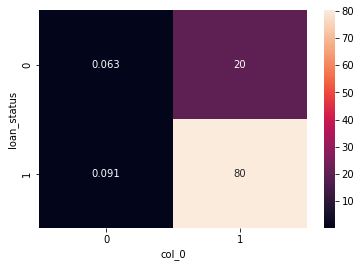

In [219]:
#Checking the probabilities for TP,TN,FP,FN
sns.heatmap(pd.crosstab(y_test,y_pred,normalize=True)*100,annot=True)
plt.show()
#Observation - There are a lot of False Positives, and very less False Negatives.

In [220]:
# Precision
precision_score(y_test,y_pred)
# Precision is okayish.

0.8037529715239492

In [221]:
# Recall
recall_score(y_test,y_pred)
# Recall score is very good.

0.9988685649632284

In [222]:
# F1_Score
f1_score(y_test,y_pred)
# F1 Score is good.

0.8907511210762332

[]

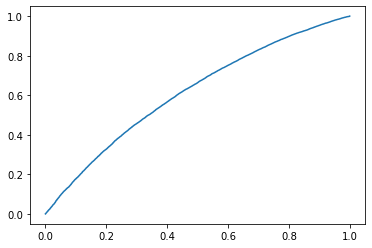

In [223]:
#ROC_Curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.plot()
#The curve is better than the average model.

In [224]:
#ROC_AUC
roc_auc_score(y_test,y_pred_proba[:,1])
# The ROC_AUC_Score is good.

0.6142135007539065

[]

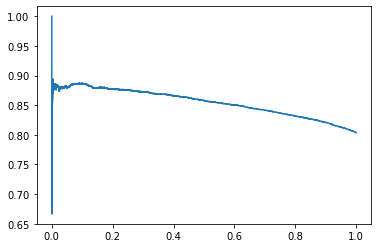

In [225]:
precision, recall, thresholds=precision_recall_curve(y_test,y_pred_proba[:,1])
plt.plot(recall,precision)
plt.plot()
#The curve is better than the average model.

In [226]:
#Precision_Recall_AUC
auc(recall,precision)
# The Precision_Recall_AUC score is good

0.8544597651544354

### Understanding the Business Requirements

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. 
- We can increase the probability threshold to decrease false positives to handle this situation.

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 
- We can increase the probability threshold for the positive class to decrease false positives to handle this situation.

### Actionable Insights & Recommendations
- Term is an important feature in determining the loan_status.
- Interest_Rate is an important feature in determining the loan_status.
- Loan_Amount is an important feature in determining the loan_status.
- Grade is an important feature in determining the loan_status.
- Annual_Income is an important feature in determining the loan_status.
- Verification_Status is an important feature in determining the loan_status.
- dti is an important feature in determining the loan_status.
- application_type is an important feature in determining the loan_status.